# Properties of a Dataset

FILES

https://raw.githubusercontent.com/ScryptIQ-ai/lesson-data/refs/heads/main/dh/patients.csv

PACKAGES

pandas
matplotlib
scikit-learn

## Introduction

**Learning Objectives**
- Practise working with Pandas DataFrames and NumPy arrays.
- How to get a quick overview of the distribution of your features.
- How to create a scatter plot for multivariate analysis.

In the previous lesson, we obtained some basic data quantifications using the `describe` function. Each of these quantities was calculated for individual columns, where each column contained a different measured variable. However, in data analysis in general (and in machine learning in particular), one of the main points of analysis is to try and exploit the presence of information that lies in relationships _between_ variables (i.e. columns in our data).

Quantities that are based on data from two variables are referred to as **bivariate** measures. Analyses that make use of bivariate (and potentially higher order) quantities are referred to as bivariate or more broadly, **multivariate data analyses**.

When we combine uni- and multivariate analyses, we can often obtain a thorough, comprehensive overview of the basic properties of a dataset.

## The diabetes dataset

First lets load in the functions we will need for this section:

In [ ]:
# To import data from a csv file into a Pandas DataFrame
from pandas import read_csv

# To import a dataset from scikit-learn
from sklearn import datasets

# To create figure environments and plots
from matplotlib.pyplot import subplots, show

NOTE BOX

In many online tutorials you can find the following convention when importing functions:

```
import numpy as np
import pandas as pd
```

(or similar). In this case, the whole library is imported and any function in that library is then available using e.g. `pd.read_csv(my_file)`

Using the diabetes dataset (introduced in the Data Handling 1 lesson), we can begin by looking at the data from three of its columns: The upper row of the below figure shows three histograms. A histogram is a summarising plot of the recordings of a single variable.
The histograms of columns with indices 3, 4, and 5 have similar means and variances, which can be explained by prior normalisation of the data. The shapes differ, but this does not tell us anything about a relationship between the measurements.

Before the application of any machine learning methods, its is important to understand whether there is evidence of any relationships between the individual variables in a DataFrame. One potential relationships is that the variables are 'similar'.
One way to check for the similarity between variables in a dataset, is to create a [scatter plot](https://en.wikipedia.org/wiki/Scatter_plot). The bottom row of the figure below contains the three scatter plots between variables used to create the histograms in the top row.

We will describe the scatter plot and its features, later.

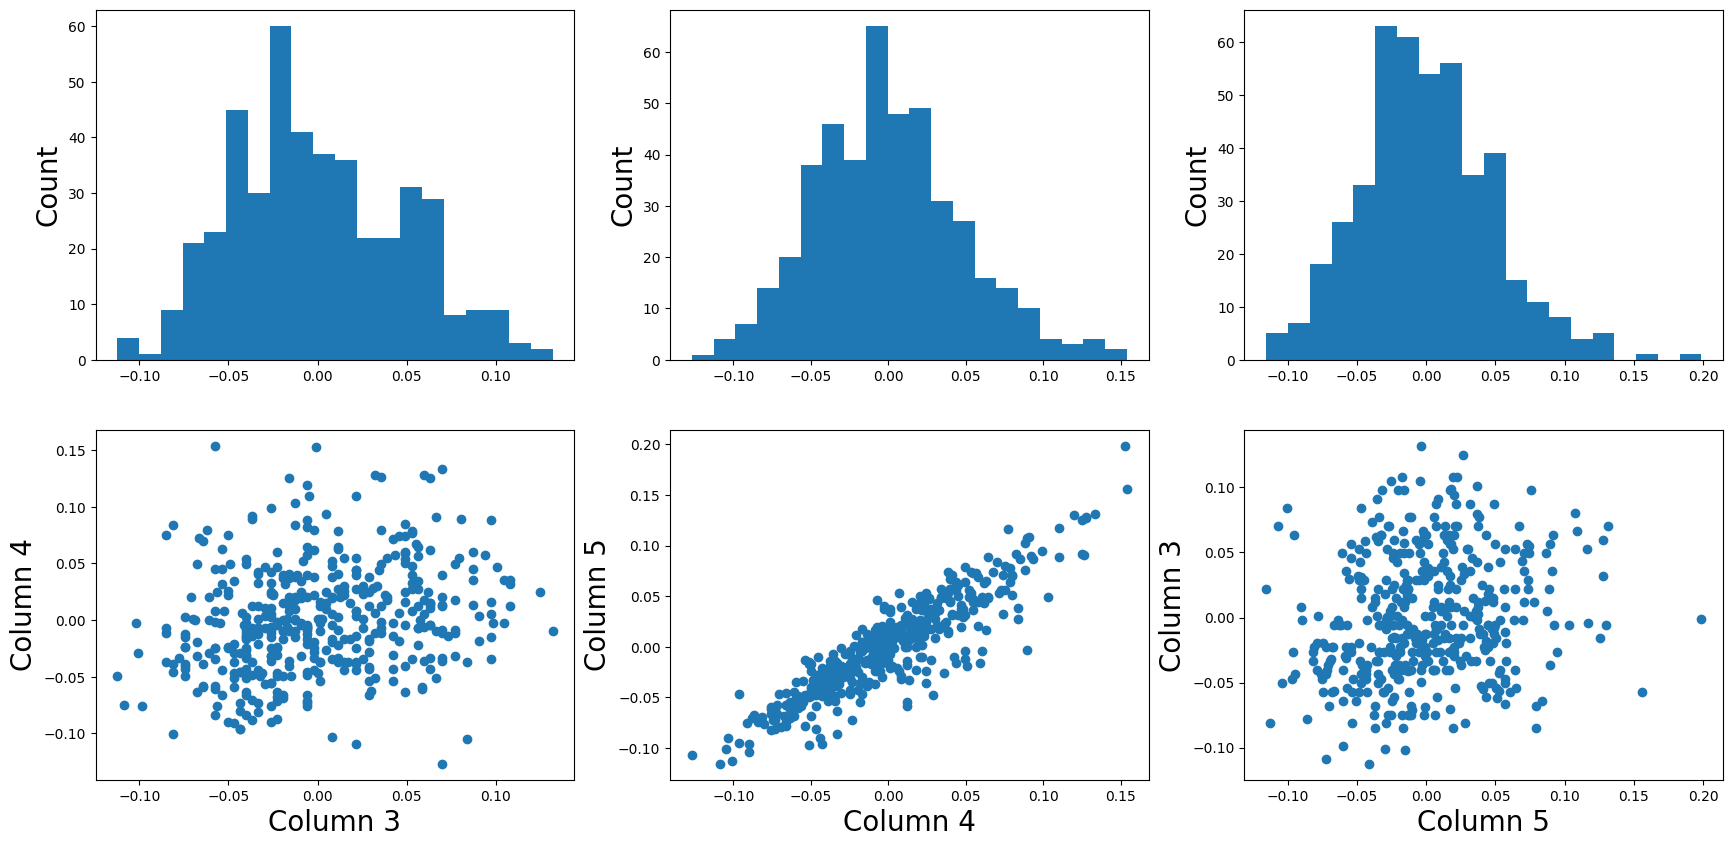

In [3]:
diabetes = datasets.load_diabetes()

diabetes_data = diabetes.data

fig, ax = subplots(figsize=(21, 10), ncols=3, nrows=2)

# Histograms
ax[0,0].hist(diabetes_data[:,3], bins=20)
ax[0,0].set_ylabel('Count', fontsize=20)

ax[0,1].hist(diabetes_data[:,4], bins=20)
ax[0,1].set_ylabel('Count', fontsize=20)

ax[0,2].hist(diabetes_data[:,5], bins=20)
ax[0,2].set_ylabel('Count', fontsize=20)

# Scatter plots
ax[1,0].scatter(diabetes_data[:,3], diabetes_data[:,4]);
ax[1,0].set_xlabel('Column 3', fontsize=20)
ax[1,0].set_ylabel('Column 4', fontsize=20)

ax[1,1].scatter(diabetes_data[:,4], diabetes_data[:,5]);
ax[1,1].set_xlabel('Column 4', fontsize=20)
ax[1,1].set_ylabel('Column 5', fontsize=20)

ax[1,2].scatter(diabetes_data[:,5], diabetes_data[:,3]);
ax[1,2].set_xlabel('Column 5', fontsize=20)
ax[1,2].set_ylabel('Column 3', fontsize=20);

show()

When plotting the data against each other in pairs (as displayed in the bottom row of the figure), data column 3 plotted against column 4 (left) and column 5 against 3 (right) both show a fairly uniform circular distribution of points. This is what would be expected if the data in the two columns were independent of each other.

In contrast, column 4 against 5 (centre, bottom) shows an elliptical, pointed shape along the main diagonal. This shows that there is a clear relationship between these data. Specifically, it indicates that the two variables recorded in these columns (indices 4 and 5) are _not_ independent of each other. They exhibit more similarity than would be expected of independent variables.

In this lesson, we aim to obtain an overview of the similarities in a dataset. We will firstly introduce **bivariate** visualisation using Matplotlib. We will then go on to demonstrate the use of NumPy functions in calculating correlation coefficients and obtaining a correlation matrix, as a means of introducing **multivariate** analysis. Combined with the basic statistics covered in the previous lesson, we can obtain a good overview of a high-dimensional dataset, prior to the application of machine learning algorithms.

## Properties of a Dataset

### Univariate properties

For recordings of variables that are contained, for example, in the columns of a DataFrame, we often assume the independence of samples: the measurement in one row does not depend on the recording present in another row. Therefore results of the features obtained under the output of the `describe` function, for instance, will not depend on the order of the rows. Also, while the numbers obtained from different rows can be similar (or even the same) by chance, there is no way to _predict_ the values in one row based on the values of another.

Contrastingly, when comparing different variables arranged in columns, this is not necessarily the case. Let us firstly assume that they are consistent: that all values in a single row are obtained from the same subject. The values in one column can be related to the numbers in another column and, specifically, they can show degrees of similarity. If, for instance, we have a number of subjects investigated (some of whom have an inflammatory disease and some of whom are healthy controls) an inflammatory marker might be expected to be elevated in the diseased subjects. If several markers are recorded from each subject (i.e. more than one column in the data frame), the values of several inflammatory markers may be elevated simultaneously in the diseased subjects. Thus, the profiles of these markers across the whole group will show a certain similarity.

The goal of multivariate data analysis is to find out whether or not any relationships exist between recorded variables.

Let us first import a demonstration dataset and check its basic statistics.

For a work-through example, we can start with the 'patients' dataset. Let's firstly import the data from the .csv file using the function `read_csv` from Pandas and load this into a DataFrame. We can then assess the number of columns and rows using the `len` function. We can also determine the data type of each column, which will reveal which columns can be analysed, quantitatively.

In [4]:
# For Mac OS and Linux:
df = read_csv('./data/patients.csv')

In [5]:
print('Number of columns: ', len(df.columns))
print('Number of rows: ', len(df))
df.head()

Number of columns:  7
Number of rows:  100


Age  Height  Weight  Systolic  Diastolic  Smoker  Gender
0   38      71   176.0     124.0       93.0       1    Male
1   43      69   163.0     109.0       77.0       0    Male
2   38      64   131.0     125.0       83.0       0  Female
3   40      67   133.0     117.0       75.0       0  Female
4   49      64   119.0     122.0       80.0       0  Female

In [ ]:
print(f'The columns are of the following data types: {df.dtypes}')

Out of the seven columns, three contain integers, three contain floating-point (decimal) numbers, and the last one contains gender specification as 'female' or 'male' - held as string data. The sixth column in this dataset contains a binary classification, with a value of '0' indicating a non-smoker individual and '1' indicating a smoker. Numerical analysis can thus be restricted to columns with indices 0 to 4.

PRACTICE EXERCISE

Find the univariate properties of the patients dataset:

1. Obtain the basic statistical properties of the first five columns using the `describe` function.
2. Plot a bar chart of the means of each column. To access a row by its name, you can use the convention `df_describe.loc['name']`.
3. **Optional:** In the bar chart of the means, try to add the standard deviation as an errorbar, using the keyword argument `yerr` in the form `yerr = df_describe.loc['std']`.

## Visual Search for Similarity

## The Scatter Plot

VIDEO

https://www.youtube.com/watch?v=NjvFh7i74pI

In Matplotlib, the function `scatter` allows a user to plot one variable against another. This is a common way to visually eyeball your data for relationships between individual columns in a DataFrame.

In [ ]:
fig, ax = subplots();

ax.scatter(df['Weight'], df['Height']);
ax.set_xlabel('Weight (pounds)', fontsize=16)
ax.set_ylabel('Height (inches)', fontsize=16)

show()

The data points appear to be grouped into two clouds. We will not deal with this qualitative aspect further, at this point. Grouping will be discussed in more detail in L2D's later lessons on Unsupervised Machine Learning and Clustering.

However, from the information shown on the plot, it is reasonable to suspect a trend where heavier people are also taller. For instance, we note that there are no points in the lower right corner of the plot (weight >160 pounds and height < 65 inches).

Scatter plots are useful for the inspection of select pairs of data. However, they are only qualitative and thus, it is generally preferred to have a numerical quantity.

PRACTICE EXERCISE

Plot systolic against diastolic blood pressure. Do the two variables appear to be independent, or related?

In [ ]:
# Create you plot here:

## Summary

We are now beginning to expand on our abilities to explore datasets from the start. Scatter plots are basic, however, they are a quick and easy tool to examine and identify any clustering of data or correlations between two features.